# Оценка успешности компьютерных игр

**Цель исследования:** на основании данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ (например, Xbox или PlayStation) выявить определяющие успешность игры закономерности для выбора потенциально популярных продуктов и планирования рекламной кампании.

Для исследования будет использованы данные до 2016 года. Нужно спланировать кампанию на следующий год.

План работы:

1. Получение и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Оформление результатов
7. Вывод

## Получение и изучение данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn
from scipy import stats as st

откроем файл и посмотрим на данные

In [2]:
data = pd.read_csv('/datasets/games.csv')
    
display (data.head(10)) 
data.info() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


построю общую гистограмму для всех числовых столбцов таблицы

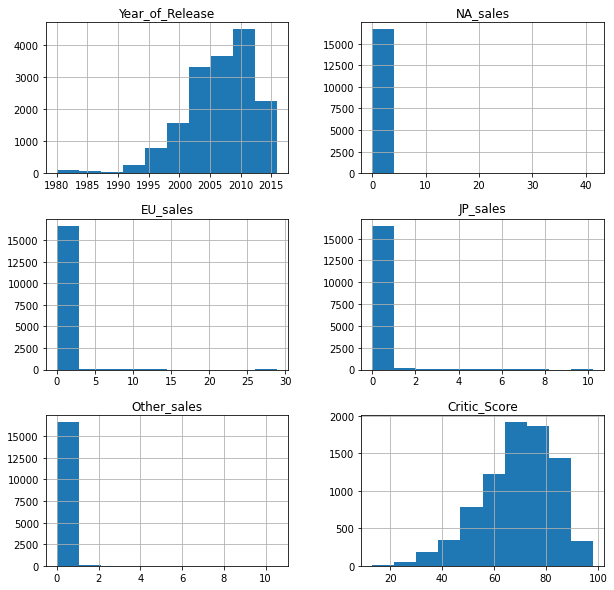

In [3]:
data.hist(figsize=(10, 10));

Заключение по шагу 1: Перед проведением анализа данные требуют предобработки - заполнения или удаления пропусков, преобразования типов данных, возможно, устранения дубликатов.

## Предобработка данных

приведем названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()
#data.info()#проверим результат

выведем количество пропусков для каждого столбца

In [5]:
data.isna().sum().to_frame().style.background_gradient()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


проведем поиск явных дубликатов во всем датафрейме

In [6]:
print (data.duplicated().sum()) #0

0


посмотрим, есть ли игры с одинаковым названием, выпущенные в один год. Если выпущены в разные года - скорее всего разные игры, а в один могли и продублироваться

In [7]:
data.groupby('year_of_release')['name'].describe()

,count,unique,top,freq
year_of_release,,,,
1980.0,9,9,Freeway,1
1981.0,46,46,Laser Blast,1
1982.0,36,36,Bump 'n' Jump,1
1983.0,17,17,Frostbite,1
1984.0,14,14,Duck Hunt,1
1985.0,14,14,Gyromite,1
1986.0,21,21,Rad Racer,1
1987.0,16,16,Dragon Warrior II,1
1988.0,15,15,Final Fantasy II,1


посмотрим, правда ли это дубликаты?

Нет, это игра, выпущенная на разных платформах, так что и анализировать эти строки надо отдельно

In [8]:
print(data.loc[data['name'] == 'FIFA 14'])

         name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
126   FIFA 14      PS3           2013.0  Sports      0.78      4.24      0.07   
271   FIFA 14     X360           2013.0  Sports      0.92      2.89      0.01   
469   FIFA 14      PS4           2013.0  Sports      0.61      1.85      0.11   
1753  FIFA 14     XOne           2013.0  Sports      0.41      0.66      0.00   
4699  FIFA 14      PSV           2013.0  Sports      0.08      0.23      0.01   
4809  FIFA 14       PC           2013.0  Sports      0.01      0.36      0.00   
4985  FIFA 14      Wii           2013.0  Sports      0.00      0.36      0.00   
6871  FIFA 14      3DS           2013.0  Sports      0.00      0.22      0.00   
7875  FIFA 14      PSP           2013.0  Sports      0.00      0.15      0.00   

      other_sales  critic_score user_score rating  
126          1.37          86.0        4.3      E  
271          0.40          84.0        4.2      E  
469          0.44          87.0  

удалим строки с отсутствующими названиями и жанрами, их всего 2 или 4, не повлияет на датафрейм. Также удалю строки, где неизвестен год выпуска игры, они бесполезны для нашего анализа и их всего 269, что меньше 2% всех данных

In [9]:
data = data.dropna(subset=['name', 'genre', 'year_of_release'])
data.isna().sum() #проверим результат

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в столбцах year_of_release,critic_score, user_score заполнять числовыми значениями  не буду, тк 
это повлияет на результаты анализа. 

заполню пропуски в столбце rating 'unknown', тк там нечисловые значения и это пригодится в дальнейшем

учитывая большое количество пропусков в столбцах рейтингов, предположу, что не все платформы собирали эти оценки

In [10]:
data['rating'] = data['rating'].fillna('unknown')
#data.isna().sum()

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

TBD в этом случае расшифровывается как "to be determined", то есть информации для анализа не несет. Считаю разумным заменить на Nan

In [11]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'].count() #2424 строки с этим значением
data.loc[(data['user_score'] == 'tbd'), 'user_score']= np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Изменим типы данных там, где нужно

0   Name             16713 non-null  object - строка это объект, оставим

 1   Platform         16715 non-null  object - строка это объект, оставим
 
 2   Year_of_Release  16446 non-null  float64 - можно изменить на int, в колонке целые числа. Но я оставила пропуски, поэтому изменить не смогла
 
 3   Genre            16713 non-null  object - строка это объект, оставим
 
 4   NA_sales         16715 non-null  float64 - оставим float, в колонке дроби
 
 5   EU_sales         16715 non-null  float64 - оставим float, в колонке дроби
 
 6   JP_sales         16715 non-null  float64 - оставим float, в колонке дроби
 
 7   Other_sales      16715 non-null  float64 - оставим float, в колонке дроби
 
 8   Critic_Score     8137 non-null   float64 - можно изменить на int, в колонке целые числа. Но я оставила пропуски , поэтому изменить не смогла
 
 9   User_Score       10014 non-null  object - **нужен тип float, в колонке дроби**
 
 10  Rating           9949 non-null   object - строка это объект, оставим


In [12]:
data['user_score']= pd.to_numeric(data['user_score'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

создадим столбец global_sales - суммарные продажи во всех регионах (миллионы проданных копий)

In [13]:
data['global_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

сгруппируем данные по годам 

In [14]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

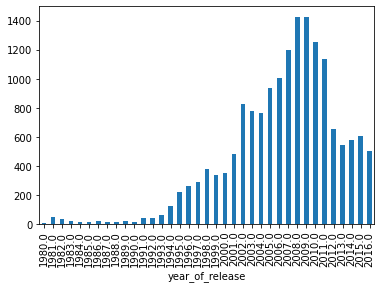

In [15]:
data.groupby('year_of_release')['name'].count().plot(kind='bar');

Количество игр непрерывно росло с нескольких десятков до более, чем тысячи, с 1980 по 2009 год. Начиная с 2009 года количество выпускаемых игр снизилось в 2 раза, в последние 5 лет оно держится около 600 в год.
Мы можем не использовать в анализе ранние годы, где и количество игр небольшое, и влияющие на продажи факторы наверняка отличались, тк игровая индустрия очень сильно изменилась за эти годы

считаю, что можно оставить данные только за последние 15 лет, в 2002 как раз был преодолен порог в 500 игр

In [16]:
data = data.query('year_of_release >= 2002')
data.groupby('year_of_release')['name'].count()

year_of_release
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?



In [17]:
data.groupby('platform')['global_sales'].sum().sort_values(ascending = False)

platform
PS2     1027.96
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
PSP      289.53
3DS      257.81
GBA      251.28
XB       228.32
PC       195.59
GC       170.39
XOne     159.32
WiiU      82.19
PSV       53.81
PS         8.74
DC         0.35
N64        0.08
Name: global_sales, dtype: float64

выше я отобразила общее количество проданных игр на разных платформах, но на основании этой информации нельзя однозначно сделать вывыод о популярности платформ. Не стоит забывать, что небольшое количество игра может быть обусловлено не только непопулярностью платформы, но и временем ее появления. 

создадим сводную таблицу sales_by_year, отображающую количество проданных игр на каждой платформе по годам. Затем построим график и попробуем оценить, как менялась популярность платформ с годами

In [18]:
sales_by_year = data.pivot_table(index = 'year_of_release', values = 'global_sales', columns = 'platform', aggfunc = 'sum')
print (sales_by_year)

platform           3DS    DC      DS    GBA     GC   N64     PC    PS     PS2  \
year_of_release                                                                 
2002.0             NaN  0.29     NaN  74.16  51.81  0.08   8.57  6.67  205.38   
2003.0             NaN   NaN     NaN  56.67  50.61   NaN   8.84  2.07  184.31   
2004.0             NaN   NaN   17.27  77.91  28.82   NaN  10.39   NaN  211.81   
2005.0             NaN   NaN  130.14  33.86  27.62   NaN   4.37   NaN  160.66   
2006.0             NaN   NaN  119.81   5.28  11.26   NaN   2.85   NaN  103.42   
2007.0             NaN  0.02  146.94   3.40   0.27   NaN   9.28   NaN   75.99   
2008.0             NaN  0.04  145.31    NaN    NaN   NaN  12.42   NaN   53.90   
2009.0             NaN   NaN  119.54    NaN    NaN   NaN  16.91   NaN   26.40   
2010.0             NaN   NaN   85.02    NaN    NaN   NaN  24.28   NaN    5.64   
2011.0           63.20   NaN   26.18    NaN    NaN   NaN  35.03   NaN    0.45   
2012.0           51.36   NaN

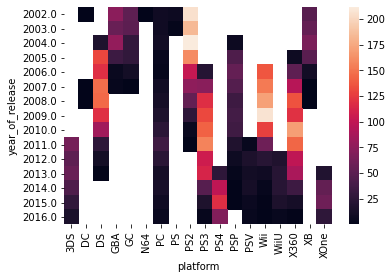

In [19]:
seaborn.heatmap(sales_by_year);

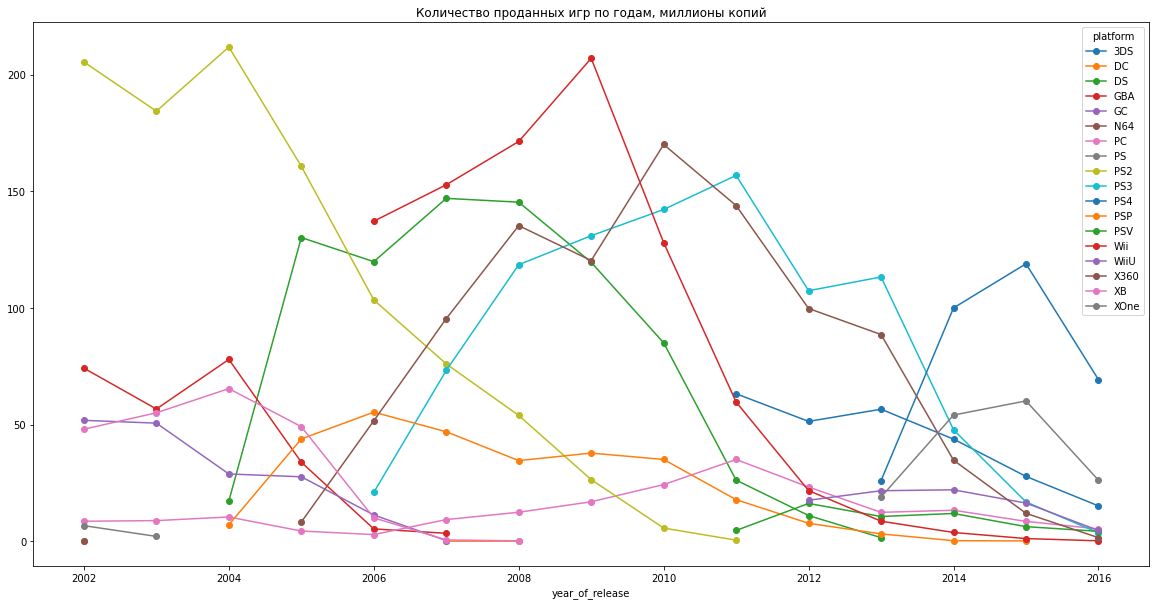

In [20]:
sales_by_year.plot(style='o-', figsize = (20, 10), title = 'Количество проданных игр по годам, миллионы копий');

на графиках видно, как в течение нескольких лет растет популярность платформ, достигает пика и постепенно снижается. Срок активных продаж игр на платформе составляет около 5-10 лет. 

До 2011 года отмечается существование явных лидеров по количеству проданных игр (PS2, GBA, PSV, N64), а после 2011 разница уменьшается, но все равно можно выделить лидеров - PS4, XOne.

Отмечается общая тенденция к уменьшению количества продаж игр в последние годы.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Ранее я оставила данные  за последние 15 лет - с 2002 года. Однако, учитывая ответ на предыдущий вопрос, где видно, что паттерн популярности платформ значительно изменился с 2011 года, а также то,что самые популярные платформы (PS4, XOne) были запущены только в 2013 году, для прогноза на 2017 год считаю разумным использовать данные с 2013 года. Не будем забывать, что индустрия игр очень быстро меняется.

In [21]:
data = data.query('year_of_release >= 2013')
data.info() #2233

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  global_sales     2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
построим график по продажам игр с 2013 года, воспользуемся сводной таблицей sales_by_year

In [22]:
sales_by_year = sales_by_year.query('year_of_release >= 2013').dropna(axis = 1, thresh=1)
print (sales_by_year)

platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU  \
year_of_release                                                                 
2013.0           56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014.0           43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015.0           27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016.0           15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

platform          X360   XOne  
year_of_release                
2013.0           88.58  18.96  
2014.0           34.74  54.07  
2015.0           11.96  60.14  
2016.0            1.52  26.15  


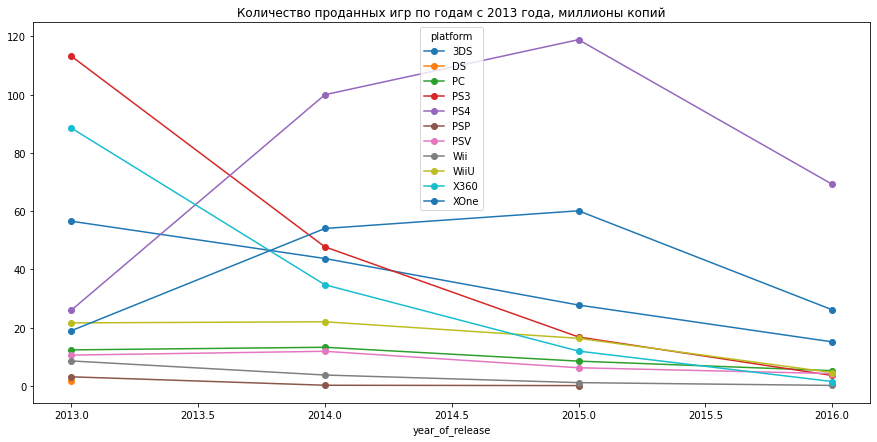

In [23]:
sales_by_year.plot(style='o-', figsize = (15, 7), title = 'Количество проданных игр по годам c 2013 года, миллионы копий');

На графике видна общая тенденция к снижению продаж игр, затронувшая все платформы.
Среди перспективных платформ в выделю PS4, XOne и 3DS, они лидирут по количеству проданных копий. Считаю, что также стоит рассмотреть PC, ее показатели продаж стабильны, начиная с 2002 года. Ранее популярные платформы PS3, X360, Wii, WiiU снижают свою популярность. Выпуск игр на PSP и DS был прекращен.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

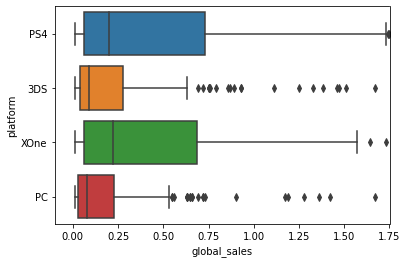

In [24]:
seaborn.boxplot(data = data.query('platform in ["PS4", "XOne", "3DS", "PC"]'),x = 'global_sales', y = 'platform');
plt.xlim(-0.1, 1.75);

Вывод: Платформы PS4 и XOne лидируют по глобальным продажам игр.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

возьмем платформу PS4, как самую популярную из выбранных ранее

Корреляция продаж игр на PS4 и отзывов критиков составляет 0.406567902061781


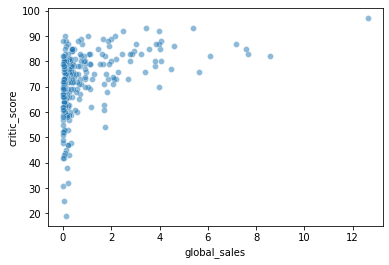

In [25]:
print('Корреляция продаж игр на PS4 и отзывов критиков составляет', 
      data.query('platform == "PS4"')['global_sales'].corr(data.query('platform == "PS4"')['critic_score']))
seaborn.scatterplot(data = data.query('platform == "PS4"'), x = 'global_sales', y = 'critic_score', alpha=0.5);

Корреляция продаж игр на PS4 и отзывов пользователей составляет -0.031957110204556376


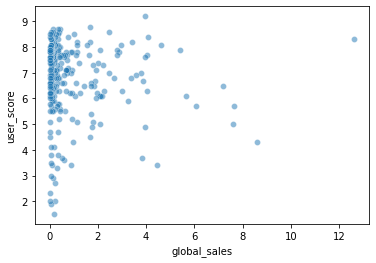

In [26]:
print('Корреляция продаж игр на PS4 и отзывов пользователей составляет', 
      data.query('platform == "PS4"')['global_sales'].corr(data.query('platform == "PS4"')['user_score']))
seaborn.scatterplot(data = data.query('platform == "PS4"'), x = 'global_sales', y = 'user_score', alpha=0.5);

Вывод: корреляция продаж и отзывов критиков составляет 0,4, что говорит о наличии слабой положительной связи.
Корреляция продаж и отзывов пользователей составляет -0,032, что говорит об отсутствии связи или ее нелинейности.

### Соотнесите выводы с продажами игр на других платформах.

Предыдущий вывод говорит, что продажи игр совсем не зависят от оценок пользователей и слабо заисят от рейтинга критиков. Проверим это на других платформах.

In [27]:
def score_sales_corr(plat):
    critic = data.query('platform == @plat')['global_sales'].corr(data.query('platform == @plat')['critic_score'])
    user = data.query('platform == @plat')['global_sales'].corr(data.query('platform == @plat')['user_score'])
    return print('Корреляция продаж игр на', plat, 'и отзывов критиков составляет',critic, '\n','Корреляция продаж игр на', plat, 'и отзывов пользователей составляет',user)

In [28]:
score_sales_corr("XOne")
score_sales_corr("3DS")
score_sales_corr("PC")
score_sales_corr("PS3")

Корреляция продаж игр на XOne и отзывов критиков составляет 0.41699832800840175 
 Корреляция продаж игр на XOne и отзывов пользователей составляет -0.06892505328279412
Корреляция продаж игр на 3DS и отзывов критиков составляет 0.35705661422881035 
 Корреляция продаж игр на 3DS и отзывов пользователей составляет 0.24150411773563016
Корреляция продаж игр на PC и отзывов критиков составляет 0.19603028294369382 
 Корреляция продаж игр на PC и отзывов пользователей составляет -0.09384186952476739
Корреляция продаж игр на PS3 и отзывов критиков составляет 0.3342853393371919 
 Корреляция продаж игр на PS3 и отзывов пользователей составляет 0.0023944027357566925


Вывод: корреляция продаж и отзывов критиков обычно слабая, а корреляция продаж и отзывов пользователей близка к 0.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


посмотрим на общее количество выпущенных игр различных жанров.

Затем составим сводную таблицу продаж по жанрам и визуализируем данные.


In [29]:
data.groupby('genre')['name'].count().sort_values(ascending = False)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

In [30]:
data.groupby('genre')['global_sales'].sum().sort_values(ascending = False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: global_sales, dtype: float64

In [31]:
data.groupby('genre')['global_sales'].describe().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.000000,0.420196,1.253909,0.010000,0.030000,0.110000,0.337500,21.050000
Adventure,245.000000,0.096490,0.216445,0.010000,0.020000,0.030000,0.070000,1.660000
Fighting,80.000000,0.441375,1.048883,0.010000,0.060000,0.125000,0.322500,7.550000
Misc,155.000000,0.405290,1.007985,0.010000,0.030000,0.100000,0.330000,9.180000
Platform,74.000000,0.576081,0.806808,0.010000,0.090000,0.225000,0.627500,4.320000
Puzzle,17.000000,0.186471,0.325172,0.010000,0.020000,0.060000,0.110000,1.190000
Racing,85.000000,0.469294,0.964101,0.010000,0.050000,0.120000,0.380000,7.090000
Role-Playing,292.000000,0.499623,1.353164,0.010000,0.060000,0.125000,0.382500,14.600000
Shooter,187.000000,1.245882,2.014107,0.010000,0.140000,0.450000,1.425000,14.630000


По средним значениям продаж наибольшую прибыльность показывают жанры Shooter, Sports, Platform, Role-Playing и Racing. По медиане выделяются Shooter, Sports, Platform, а вот Role-Playing и Racing приближаются по продажам к группе менне прибыльных платформ. Здесь правильнее оценить по медиане, тк на среднее значение оказывают большое влияние выбросы

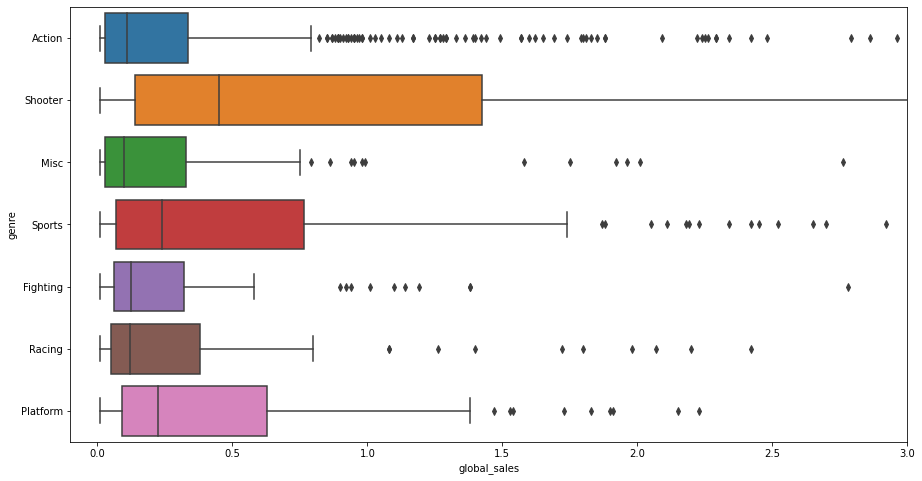

In [32]:
plt.figure(figsize=(15, 8))
seaborn.boxplot(data = data.query(
                'genre in ["Action", "Shooter", "Sports", "Role-playing", "Platform", "Misc","Racing", "Fighting"]'),
                x = 'global_sales', y = 'genre');
plt.xlim(-0.1, 3);

По медиане продаж лидируют жанры Shooter, Sports и Platform, которые находятся на 2, 3 и 6 месте, соответственно, по общему количеству продаж.

In [33]:
sales_by_genre = data.pivot_table(index = 'year_of_release', values = 'global_sales', columns = 'genre', aggfunc = 'sum')
print (sales_by_genre)

genre            Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
year_of_release                                                                 
2013.0           122.51       6.09      7.09  25.27     24.54    0.96   12.37   
2014.0            97.23       5.57     15.85  23.38      8.81    1.49   16.66   
2015.0            72.02       8.16      7.90  11.57      6.05    0.71    8.07   
2016.0            30.11       3.82      4.47   2.60      3.23    0.01    2.79   

genre            Role-Playing  Shooter  Simulation  Sports  Strategy  
year_of_release                                                       
2013.0                  44.45    62.04        8.63   41.17      6.12  
2014.0                  45.62    65.21        5.58   45.15      0.98  
2015.0                  37.64    67.51        5.66   40.84      1.85  
2016.0                  18.18    38.22        1.89   23.49      1.13  


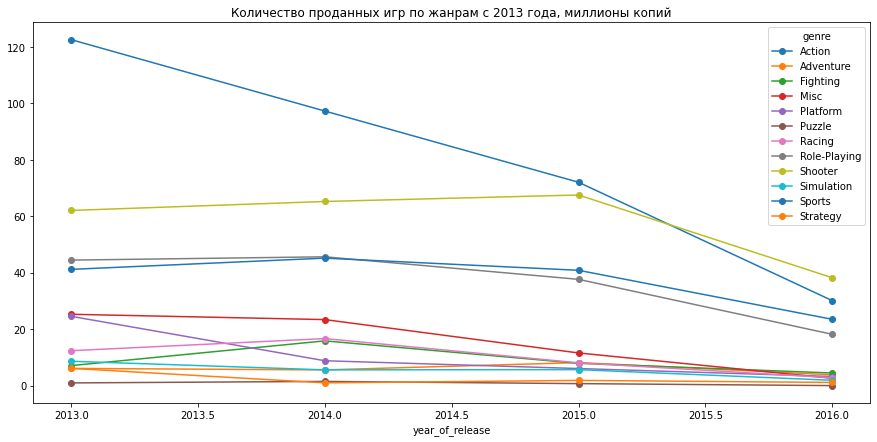

In [34]:
sales_by_genre.plot(style='o-', figsize = (15, 7), title = 'Количество проданных игр по жанрам c 2013 года, миллионы копий');

Вывод: По медиане продажах лидируют жанры Shooter, Sports и Platform, которые находятся на 2, 3 и 6 месте по общему количеству продаж, соответственно. Лидерство жанров Action и Role-playing по общему количеству продаж, вероятно, объясняется наличием отдельных популярных игр - выбросами.
Продажи и выпуск игр жанров Racing, Fighting, Platform, Simulation, Strategy, Puzzle не превышают 20 миллиронов копий во всем мире.

## Составьте портрет пользователя каждого региона
### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Рассчитаем доли продаж на каждой платформе в каждом регионе и выберу топ 5 платформ

In [35]:
df_na_sales = data.groupby('platform')['na_sales'].sum().transform(lambda x: 100*x/x.sum()
                                                                  ).sort_values(ascending = False).nlargest(5)
#print (df_na_sales)

In [36]:
df_eu_sales = data.groupby('platform')['eu_sales'].sum().transform(lambda x: 100*x/x.sum()
                                                                  ).sort_values(ascending = False).nlargest(5)
#print (df_eu_sales)

In [37]:
df_jp_sales = data.groupby('platform')['jp_sales'].sum().transform(lambda x: 100*x/x.sum()
                                                                  ).sort_values(ascending = False).nlargest(5)
#print (df_jp_sales)

Построю график распределения продаж по регионам для наглядности.

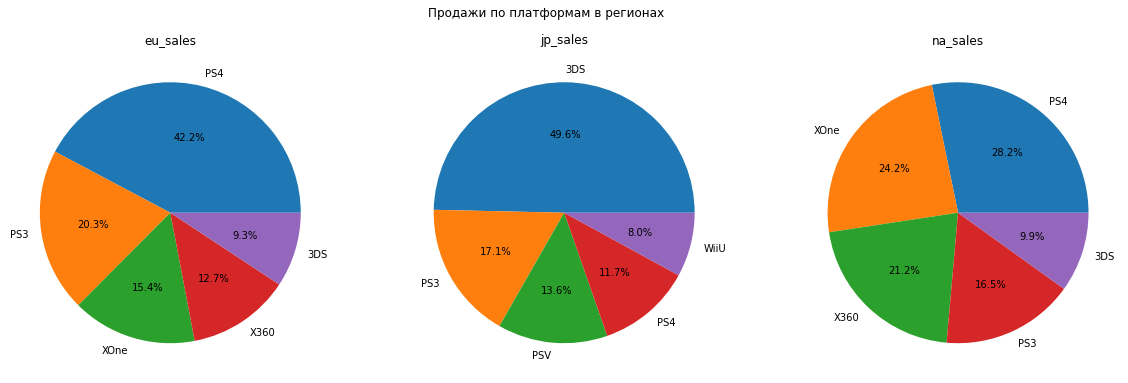

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('Продажи по платформам в регионах')
ax1.pie(df_eu_sales, labels = df_eu_sales.index, autopct='%1.1f%%')
ax1.set_title('eu_sales')
ax2.pie(df_jp_sales, labels = df_jp_sales.index, autopct='%1.1f%%')
ax2.set_title('jp_sales')
ax3.pie(df_na_sales, labels = df_na_sales.index, autopct='%1.1f%%')
ax3.set_title('na_sales')

plt.show()

Вывод: популярность платформ отличается в разных регионах. В Европе самыми популярными платформами являются PS4 (42,2%), Ps3 (20,3%), XOne (15,4%), в Северной Америке - являются PS4 (28,2%), XOne (24,2%) и X360 (21,2%), а в Японии - 3DS (49,6%), PS3 (17,1%) и PSV (13,6%). Другие регионы: Самыми популярными платформами являются PS4, Ps3, XOne.

### Определите для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5). Поясните разницу.

Рассчитаем доли продаж каждого жанра в каждом регионе и выберем топ 5 жанров

In [42]:
df_na_genre = data.groupby('genre')['na_sales'].sum().transform(lambda x: 100*x/x.sum()
                                                                  ).sort_values(ascending = False).nlargest(5)
print (df_na_genre)

genre
Action          28.797606
Shooter         25.071394
Sports          14.911700
Role-Playing    10.600626
Misc             6.280414
Name: na_sales, dtype: float64


In [43]:
df_eu_genre = data.groupby('genre')['eu_sales'].sum().transform(lambda x: 100*x/x.sum()
                                                                  ).sort_values(ascending = False).nlargest(5)
print (df_eu_genre)

genre
Action          30.117533
Shooter         22.400122
Sports          15.429722
Role-Playing     9.425592
Racing           5.147490
Name: eu_sales, dtype: float64


In [44]:
df_jp_genre = data.groupby('genre')['jp_sales'].sum().transform(lambda x: 100*x/x.sum()
                                                                  ).sort_values(ascending = False).nlargest(5)
print (df_jp_genre)

genre
Role-Playing    36.255150
Action          28.761188
Misc             6.535019
Fighting         5.434011
Shooter          4.695269
Name: jp_sales, dtype: float64


Построю график распределения продаж по регионам для наглядности.

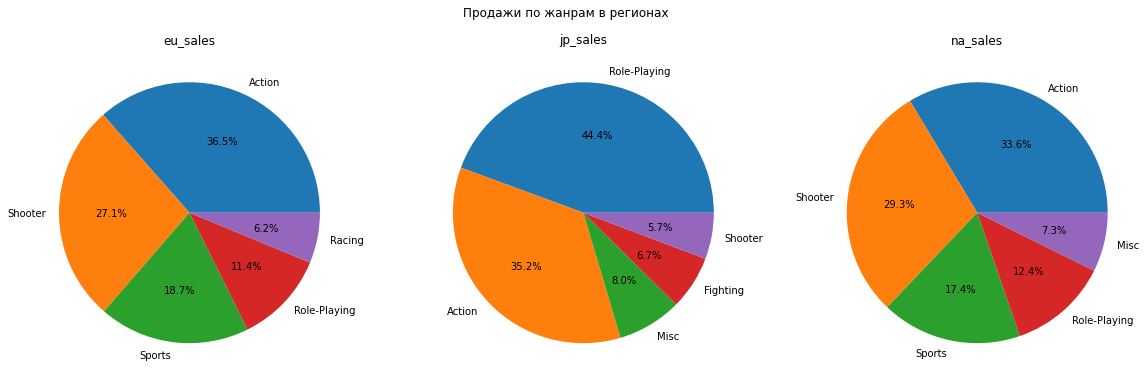

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('Продажи по жанрам в регионах')
ax1.pie(df_eu_genre, labels = df_eu_genre.index, autopct='%1.1f%%')
ax1.set_title('eu_sales')
ax2.pie(df_jp_genre, labels = df_jp_genre.index, autopct='%1.1f%%')
ax2.set_title('jp_sales')
ax3.pie(df_na_genre, labels = df_na_genre.index, autopct='%1.1f%%')
ax3.set_title('na_sales')
plt.show()

Вывод: популярность жанров игр отличается в разных регионах. В Европе самыми популярными жанрами являются Action (36,5%), Shooter(27,1%), Sports (18,7%), Role-Playing (11.4%) и Racing (6.2%), в Северной Америке самыми популярными жанрами являются Action (33,6%), Shooter (29,3%), Sports (17,4%), Role-Playing (12.4%), Misc (7.3%). А в Японии - Role-Playing (44,4%), Action (35,2%), Misc (8%) Fighting (6.7%), Shooter (5.7%). В целом можно сказать, что рынки Европы и Северной Америки достаточно схожи, а рынок Японии значительно от них отличается.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

посмотрим на уникальные значения столбца рейтинга и разберемся со их смыслом.

In [46]:
print (data['rating'].unique())

['M' 'unknown' 'E' 'T' 'E10+']


Здесь есть следующие значения рейтинга : 

«E» («Everyone») — «Для всех»: Содержание  подходит для всех возрастов.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

«M» («Mature») — «Для взрослых»


сгруппирую продажи в разных регионах по рейтингам игр и визуализирую данные

In [47]:
eu_rating = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
na_rating = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
other_rating = data.groupby('rating')['other_sales'].sum().sort_values(ascending=False)

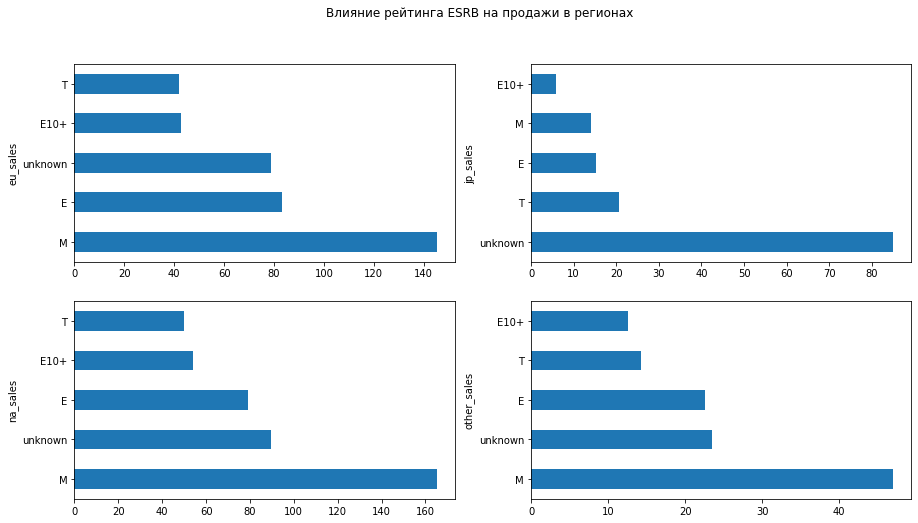

In [48]:
fig, axis =plt.subplots(nrows = 2, ncols = 2, figsize = (15, 8))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
eu_rating.plot.barh(ax=axis[0,0]).set(ylabel='eu_sales')
jp_rating.plot.barh(ax=axis[0,1]).set(ylabel='jp_sales')
na_rating.plot.barh(ax=axis[1,0]).set(ylabel='na_sales')
other_rating.plot.barh(ax=axis[1,1]).set(ylabel='other_sales')
plt.show()

Вывод: продажи игр с рейтингом «M» («Mature») — «Для взрослых» лидируют во всех регионах, кроме Японии. По Японии нельзя сделать однозначных выводов, тк для большей части игр рейтинг неизвестен. Наименне популярны игры с рейтингами «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».


**Вывод по шагу 4**

В целом можно сказать, что рынки Европы и Северной Америки достаточно схожи, а рынок Японии значительно от них отличается.

Составим портрет пользователя каждого региона:

Европа:  Самыми популярными платформами являются PS4 (42,2%), Ps3 (20,3%), XOne (15,4%). В Европе самыми популярными жанрами являются Action (36,5%), Shooter(27,1%), Sports (18,7%), Role-Playing (11.4%) и Racing (6.2%). Продажи игр с рейтингом «M» («Mature») лидируют со значительным отрывом. Наименее популярны игры с рейтингами «T» («Teen») и «E10+» («Everyone 10 and older»).

Северная Америка: Самыми популярными платформами являются PS4 (28,2%), XOne (24,2%) и X360 (21,2%). Самыми популярными жанрами являются Action (33,6%), Shooter (29,3%), Sports (17,4%), Role-Playing (12.4%), Misc (7.3%). Продажи игр с рейтингом «M» («Mature») лидируют со значительным отрывом. Наименее популярны игры с рейтингами «T» («Teen») и «E10+» («Everyone 10 and older»).

Япония: Самыми популярными платформами являются 3DS (49,6%), PS3 (17,1%) и PSV (13,6%). Самыми популярными жанрами являются Role-Playing (44,4%), Action (35,2%), Misc (8%) Fighting (6.7%), Shooter (5.7%). По продажам игр в зависимости от возрастного рейтинга нельзя сделать однозначных выводов, тк для большей части игр рейтинг неизвестен.


## Проверьте гипотезы

###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза это гипотеза об отсутствии различий. Альтернативная гипотеза противоречит нулевой и говорит о возможном отклонении и в большую, и в меньшую стороны (двусторонняя).

H₀: Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформ PC 

H₁: Средние пользовательские рейтинги платформ Xbox One не равны средним пользовательским рейтингам платформ PC 

In [49]:
user_score_xbox = data.query('platform=="XOne"')['user_score'].dropna()
user_score_pc = data.query('platform=="PC"')['user_score'].dropna()

print ('Количество оценок пользователй Xbox One:', user_score_xbox.count(), '\n', 
       'Количество оценок пользователй РС:', user_score_pc.count())


Количество оценок пользователй Xbox One: 182 
 Количество оценок пользователй РС: 155


Выберем метод статистической оценки. Мы проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, поэтому исползуем scipy.stats.ttest_ind (array1, array2, equal_var).

Выполнены необходимые для этого условия: Генеральные совокупности не зависят друг от друга. Выборочные средние нормально распределены (Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние будут распределены нормально вокруг истинного среднего этой совокупности). Дисперсии рассматриваемых генеральных совокупностей равны (если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то оставляем equal_var =True)

критический уровень статистической значимости alpha задам 0,05

In [50]:
alpha = 0.05 # 
results = st.ttest_ind(user_score_xbox, user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вывод: На основании проверенных гипотез можно сказать, что вероятность случайно получить такое или большее различие равна почти 14%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами. То есть наше предположение о равенстве среднего рейтинга платформ Xbox One и PC нельзя отрицать.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза это гипотеза об отсутствии различий. Альтернативная гипотеза противоречит нулевой и говорит о возможном отклонении и в большую, и в меньшую стороны (двусторонняя).

H₀: Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports 

H₁: Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports

In [51]:
user_score_action = data.query('genre=="Action"')['user_score'].dropna()
user_score_sports = data.query('genre=="Sports"')['user_score'].dropna()

print ('Количество оценок пользователей жанра Action:', user_score_action.count(), '\n', 
       'Количество оценок пользователей жанра Sports:', user_score_sports.count())


Количество оценок пользователей жанра Action: 389 
 Количество оценок пользователей жанра Sports: 160


Выберем метод статистической оценки. Мы проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, поэтому исползуем scipy.stats.ttest_ind (array1, array2, equal_var).

Выполнены необходимые для этого условия: Генеральные совокупности не зависят друг от друга. Выборочные средние нормально распределены (Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние будут распределены нормально вокруг истинного среднего этой совокупности). Дисперсии рассматриваемых генеральных совокупностей равны (если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то оставляем equal_var =True)

критический уровень статистической значимости alpha задам 0,05

In [52]:
alpha = 0.05 # 
results = st.ttest_ind(user_score_action, user_score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Вывод: На основании проверенных гипотез можно сказать, что вероятность случайно получить такой результат при условии, что нулевая гипотеза верна, очень низка, значительно меньше, чем alpha. Поэтому мы принимаем альтернативную гипотезу. То есть считаем, что средние пользовательские рейтинги жанров Action и Sports разные.

## Напишите общий вывод

**При работе над проектом были выполнены этапы:**

1.	Получение и изучение данных
2.	Предобработка данных. Удалены пропуски в данных, какие-то пропуски были заменены на ‘unknown’ для дальнейшей работы. Добавлены столбцы для последующей обработки значений. Изменены типы данных.
3.	Исследовательский анализ данных. Проведена оценка выпуска игр в разные годы и на разных платформах, на основании полученных результатов выбран актуальный период для анализа. Выбраны потенциально прибыльные платформы. Проведена оценка влияния отзывов пользователей и критиков на продажи игр. Выбраны наиболее прибыльные жанры. Результаты представлены в виде графиков для удобства восприятия.
4.	Составлен портрет пользователя разных регионов (NA, EU, JP). Результаты представлены в виде графиков для удобства восприятия.
5.	 Проверены гипотезы о пользовательских рейтингах разных платформ и жанров.
6.	Оформление результатов
7.	 Вывод

**Сформулировны следующие выводы:**

1.	Выявлены следующие определяющие успешность игры закономерности для выбора потенциально популярных продуктов и планирования рекламной кампании:

•	В лидерах по продажам в Европе и Северной Америке сейчас платформы PS4 и XOne. В Японии популярна 3DS.

•	Выявлена слабая положительная корреляция продаж и отзывов критиков. Корреляция продаж и отзывов пользователей близка к 0

•	в мировых продажах лидируют жанры Shooter, Sports и Platform, которые находятся на 2, 3 и 6 месте по общему количеству продаж, соответственно. Лидерство жанров Action и Role-playing в общем количестве продаж, вероятно, объясняется наличием отдельных популярных игр - выбросами.

•	У пользователей разных регионов различаются предпочтения платформ и жанров, что надо учитывать в планировании продаж

•	Во всех регионах, где доступны данные, лидируют продажи игр с рейтингом «M» («Mature») — «Для взрослых» 

2.	Составлены портреты пользователей регионов. В целом можно сказать, что рынки Европы и Северной Америки достаточно схожи, а рынок Японии значительно от них отличается.

•	Европа:  Самыми популярными платформами являются PS4 (42,2%), Ps3 (20,3%), XOne (15,4%). В Европе самыми популярными жанрами являются Action (36,5%), Shooter(27,1%), Sports (18,7%), Role-Playing (11.4%) и Racing (6.2%). Продажи игр с рейтингом «M» («Mature») лидируют со значительным отрывом. Наименее популярны игры с рейтингами «T» («Teen») и «E10+» («Everyone 10 and older»).

•	Северная Америка: Самыми популярными платформами являются PS4 (28,2%), XOne (24,2%) и X360 (21,2%). Самыми популярными жанрами являются Action (33,6%), Shooter (29,3%), Sports (17,4%), Role-Playing (12.4%), Misc (7.3%). Продажи игр с рейтингом «M» («Mature») лидируют со значительным отрывом. Наименее популярны игры с рейтингами «T» («Teen») и «E10+» («Everyone 10 and older»).

•	Япония: Самыми популярными платформами являются 3DS (49,6%), PS3 (17,1%) и PSV (13,6%). Самыми популярными жанрами являются Role-Playing (44,4%), Action (35,2%), Misc (8%) Fighting (6.7%), Shooter (5.7%). По продажам игр в зависимости от возрастного рейтинга нельзя сделать однозначных выводов, тк для большей части игр рейтинг неизвестен.


3.	Срок активных продаж игр на платформе составляет около 5-10 лет. В течение нескольких лет популярность платформ растет, достигает пика и постепенно снижается. 

4.	Отмечается общая тенденция к уменьшению количества продаж игр в последние годы.

5.	Индустрия игр быстро меняется.

6.	Не получилось отвергнуть гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC.
7.	Гипотеза о  равенстве пользовательских рейтингов жанра Action и жанра Sports отвергнута.

